In [26]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [27]:
df = pd.read_csv("OnlineRetail.csv", encoding = "ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Thay thế giá trị khuyết thiếu của thuộc tính Description bằng giá trị mặc định “Không biết”

In [29]:
df['Description'].fillna('Không biết',inplace = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


có nhiều dữ liệu khuyết thiếu, cần xử lý loại bỏ

In [31]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [32]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


Thực hiện phát hiện giá trị ngoại lai của thuộc tính Quantity và Thuộc tính UnitPrice

In [33]:
df['CustomerID'] = str(df['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      406829 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 27.9+ MB


In [34]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Quantity     10.0
UnitPrice     2.5
dtype: float64


In [35]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.info()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9344\877507392.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 344393 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    344393 non-null  object 
 1   StockCode    344393 non-null  object 
 2   Description  344393 non-null  object 
 3   Quantity     344393 non-null  int64  
 4   InvoiceDate  344393 non-null  object 
 5   UnitPrice    344393 non-null  float64
 6   CustomerID   344393 non-null  object 
 7   Country      344393 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 23.6+ MB


biểu đồ đường thể hiện xu hướng thay đổi số lượng đơn hàng theo thời gian trong năm 2011

In [36]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
d1 = df[['InvoiceNo', 'InvoiceDate']]
d1 = d1.drop_duplicates(subset = 'InvoiceNo', keep = 'first')
d1 = d1.set_index(['InvoiceDate'])
d2 = d1['2011']
d2 = d2.reset_index()
d3 = d2.groupby(by=d2['InvoiceDate'].dt.date).count()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9344\1059690392.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  d2 = d1['2011']


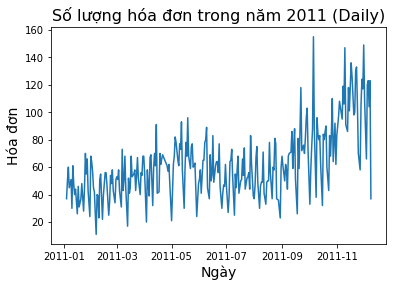

In [37]:
x = d3.index.get_level_values(0)
plt.plot(x, d3['InvoiceDate'])
plt.title('Số lượng hóa đơn trong năm 2011 (Daily)', fontsize = 16)
plt.xlabel('Ngày', fontsize = 14)
plt.ylabel('Hóa đơn', fontsize = 14)
plt.show()

biểu đồ cột so sánh số lượng đơn hàng trong các tháng của năm 2011

In [38]:
d4 = d2.groupby(by=d2['InvoiceDate'].dt.month).count()
d4

,InvoiceDate,InvoiceNo
InvoiceDate,,
1,1087,1087
2,1043,1043
3,1406,1406
4,1198,1198
5,1605,1605
6,1508,1508
7,1388,1388
8,1346,1346
9,1851,1851


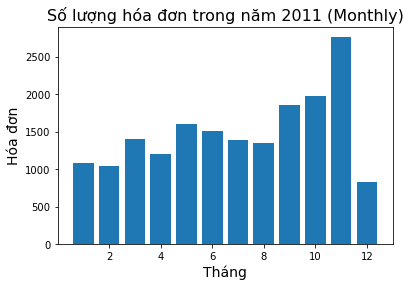

In [39]:
x = d4.index.get_level_values(0)
plt.bar(x, d4['InvoiceDate'])
plt.title('Số lượng hóa đơn trong năm 2011 (Monthly)', fontsize = 16)
plt.xlabel('Tháng', fontsize = 14)
plt.ylabel('Hóa đơn', fontsize = 14)
plt.show()

Biểu đồ đường thể hiện doanh thu theo từng tháng năm 2011.

Biểu đồ cột thể hiện số lượng đơn hàng trong các tháng của năm 2011.

In [40]:
dt1 = df[['InvoiceNo', 'InvoiceDate', 'Quantity', 'UnitPrice']] 
dt1['Revenue'] = dt1['Quantity'] * dt1['UnitPrice'] 
dt1 = dt1.set_index(['InvoiceDate']) 
dt2 = dt1['2011'] 
dt2 = dt2.reset_index()
dt3 = dt2.groupby(by=d2['InvoiceDate'].dt.month).sum() 

dt4 = dt1.drop_duplicates(subset = 'InvoiceNo', keep = 'first') 
dt4 = dt4['2011']
dt4 = dt4.reset_index()
dt5 = dt4.groupby(by=dt4['InvoiceDate'].dt.month).count() 

C:\Users\Admin\AppData\Local\Temp\ipykernel_9344\4124783467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt1['Revenue'] = dt1['Quantity'] * dt1['UnitPrice']
C:\Users\Admin\AppData\Local\Temp\ipykernel_9344\4124783467.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dt2 = dt1['2011']
C:\Users\Admin\AppData\Local\Temp\ipykernel_9344\4124783467.py:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  dt4 = dt4['2

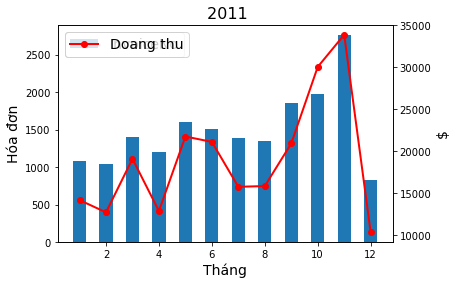

In [41]:
x = dt5.index.get_level_values(0)
plt.bar(x, dt5['InvoiceNo'], width = 0.5, label = 'InvoiceNo')
axes1 = plt.gca()
axes2 = axes1.twinx()
axes2.plot(x, dt3['Revenue'], label = 'Doang thu', linewidth = 2, c = 'r', marker = 'o')
axes1.set_xlabel('Tháng', fontsize = 14)
axes1.set_ylabel('Hóa đơn', fontsize = 14)
axes2.set_ylabel('$', fontsize = 14)

axes1.legend(fontsize = 14)
axes2.legend(fontsize = 14)
plt.title(' 2011', fontsize = 16)
plt.show()